In [1]:
import pandas as pd
import numpy as np
import json
pd.set_option('display.max_columns', 500)

MARKET = "eth_cbbtc_usdc"
EVENTS_PATH = "/Users/yegortrussov/Documents/ml/lending_protocols/dataset_collection/data/markets_labelled"
HOURLY_MARKET_PATH = "/Users/yegortrussov/Documents/ml/lending_protocols/dataset_collection/data/markets_hourly_data"

df = pd.read_csv(f"{EVENTS_PATH}/{MARKET}.csv")
market_df = pd.read_csv(f"{HOURLY_MARKET_PATH}/{MARKET}.csv")

df.head(2)

,hash,type,timestamp,user_address,assets,assets_usd,liquidated_assets,liquidated_assets_usd,market,datetime,market_address,total_supply_before,total_borrow_before,total_supply_after,total_borrow_after,utilization_before,utilization_after,tx_actions,borrow_rate_before,supply_rate_before,borrow_rate_after,supply_rate_after,collateral_price,loan_asset_price,collateral_before,collateral_value_before,debt_before,ltv_before,collateral_after,collateral_value_after,debt_after,ltv_after,health_factor_before,health_factor_after,event_type,vault_flg,volatility_1h,drawdown_1h,trend_1h,volatility_6h,drawdown_6h,trend_6h,volatility_24h,drawdown_24h,trend_24h,hash_short,event_sequence_type
0,0xcbf9186fe08ab70d98098d274e46f380248321e1bc07...,MarketSupply,1757435615,0x0000000000000000000000000000000000000001,1100000,1.099788,0,0.0,eth_cbbtc_usdc,2025-09-09 16:33:35,0x64d65c9a2d91c36d56fbc42d69e979335320169b3df6...,4.708136e+08,3.763097e+08,4.708139e+08,3.763100e+08,0.799275,0.799275,1,0.041319,0.033026,0.041319,0.033026,111014.000000,0.999803,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,loan_position_supply,False,0,0,0,0.003739,0.0,-0.015004,0.003234,0.000000,-0.012060,0xcbf9186f,loan_position_supply
1,0xc7938048f930dcad275757ef6531bc27cce264d6cead...,MarketSupply,1761595235,0x000000000000000000000000000000000000dEaD,10586,0.010585,0,0.0,eth_cbbtc_usdc,2025-10-27 20:00:35,0x64d65c9a2d91c36d56fbc42d69e979335320169b3df6...,4.769922e+08,4.168996e+08,4.769930e+08,4.169004e+08,0.874018,0.874018,1,0.044545,0.038934,0.044545,0.038934,114836.091413,0.999801,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,loan_position_supply,False,0,0,0,0.004437,0.0,-0.000236,0.003686,-0.012068,0.011874,0xc7938048,loan_position_supply


In [2]:
market_df.head(5)

,timestamp,datetime,total_supply,total_borrow,utilization,borrow_rate,supply_rate,volatility_1h,drawdown_1h,volatility_6h,drawdown_6h,collateral_price,loan_asset_price,avg_health_factor,asset_price
0,1726142400,2024-09-12 12:00:00,0.0,0.00,0.00,0.000000,0.000000,0,0,0.0,0.0,0.0,0.000000,0.0,0.0
1,1726146000,2024-09-12 13:00:00,1.0,0.89,0.89,0.013895,0.012367,0,0,0.0,0.0,0.0,0.999641,0.0,0.0
2,1726149600,2024-09-12 14:00:00,1.0,0.89,0.89,0.013895,0.012367,0,0,0.0,0.0,0.0,0.999641,0.0,0.0
3,1726153200,2024-09-12 15:00:00,1.0,0.89,0.89,0.013895,0.012367,0,0,0.0,0.0,0.0,0.999641,0.0,0.0
4,1726156800,2024-09-12 16:00:00,1.0,0.89,0.89,0.013895,0.012367,0,0,0.0,0.0,0.0,0.999641,0.0,0.0


In [3]:
df["event_sequence_type"].unique()

array(['loan_position_supply', 'loan_position_withdraw', 'position_open',
       'repay_partial', 'position_close', 'borrow_more_w_collateral',
       'collateral_add', 'borrow_more', 'collateral_withdraw', 'other',
       'liquidation', 'repay_full', 'position_adjust'], dtype=object)

In [ ]:
from utils import (
    select_users_by_period,
    create_hourly_user_dataset,
)

cohort_actions = select_users_by_period(
    df,
    start_date="2025-06-01",
    end_date="2025-09-01",
    threshold_date="2025-11-01",
)
cohort_actions.shape, cohort_actions["user_address"].nunique()



((1377, 47), 142)

In [ ]:

hourly_data = create_hourly_user_dataset(
    cohort_actions,
    market_df,
    n_hours=3,
    threshold_date="2025-11-01",
)

,user_address,timestamp,datetime,collateral,debt,ltv,action,total_supply,total_borrow,market_utilization,borrow_rate,supply_rate,collateral_price,loan_asset_price,volatility_6h,drawdown_6h
0,0x0101d6a6f24616978036717E4BF048b8C60F7f0B,1756854635,2025-09-02 23:10:35,0.310804,14997.27,0.433346,position_open,4.016077e+08,3.606881e+08,0.898111,0.042287,0.037979,111330.0,0.999818,0.002411,-0.006117
1,0x0101d6a6f24616978036717E4BF048b8C60F7f0B,1756865435,2025-09-03 02:10:35,0.310804,14997.27,0.434044,none,4.008410e+08,3.608431e+08,0.900215,0.042628,0.038377,111140.0,0.999719,0.002409,-0.004004


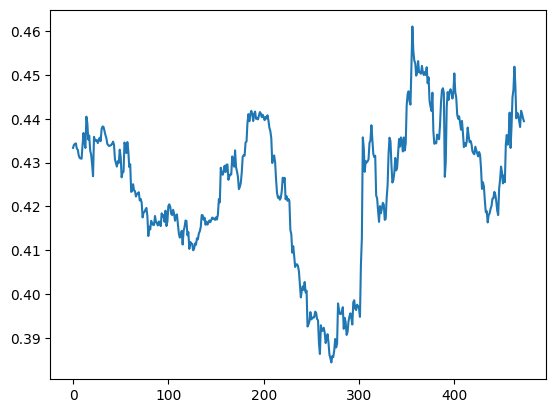

In [6]:
hourly_data["action"].value_counts()

hourly_data[hourly_data["user_address"] == "0x0101d6a6f24616978036717E4BF048b8C60F7f0B"]["ltv"].plot()

df[df["user_address"] == "0x0101d6a6f24616978036717E4BF048b8C60F7f0B"]["ltv_after"]

hourly_data.head(2)

<Axes: >

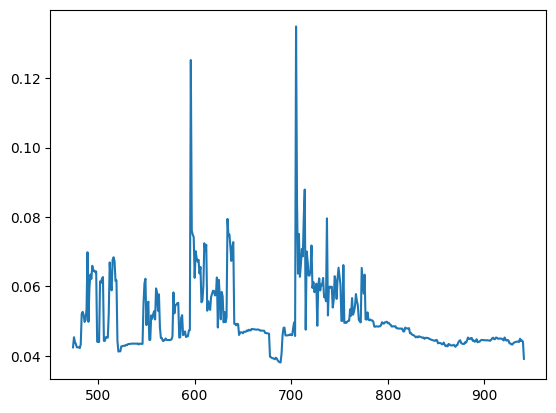

In [7]:
cohort_actions[cohort_actions["user_address"] == "0x0424ece0EA139F2df634fe5EB97a2c8A49289596"]
hourly_data[hourly_data["user_address"] == "0x0424ece0EA139F2df634fe5EB97a2c8A49289596"]["borrow_rate"].plot()


In [8]:
def create_model_dataset(hourly_user_df, target_horizon_hours=1):
    df = hourly_user_df.sort_values(['user_address', 'timestamp']).copy()
    
    # Create lagged features
    df['prev_borrow_rate'] = df.groupby('user_address')['borrow_rate'].shift(1)
    df['prev_ltv'] = df.groupby('user_address')['ltv'].shift(1)
    df['prev_utilization'] = df.groupby('user_address')['market_utilization'].shift(1)
    
    # Differences from previous period
    df['borrow_rate_diff'] = df['borrow_rate'] - df['prev_borrow_rate']
    df['ltv_diff'] = df['ltv'] - df['prev_ltv']
    df['utilization_diff'] = df['market_utilization'] - df['prev_utilization']
    
    # Interaction features
    df['ltv_borrow_rate'] = df['ltv'] * df['borrow_rate']
    df['debt_borrow_rate'] = df['debt'] * df['borrow_rate']
    
    # Rolling means (last 3 periods)
    df['borrow_rate_ma3'] = df.groupby('user_address')['borrow_rate'].transform(lambda x: x.rolling(3, min_periods=1).mean())
    df['volatility_ma3'] = df.groupby('user_address')['volatility_6h'].transform(lambda x: x.rolling(3, min_periods=1).mean())
    
    # Distance from liquidation (if ltv > 0)
    df['dist_from_liq'] = (0.86 - df['ltv']).clip(lower=0)  # assuming 86% liquidation threshold
    
    # Target: is there an action in next period?
    df['action_next'] = df.groupby('user_address')['action'].shift(-1).apply(lambda x: 1 if x != 'none' else 0)
    
    # Filter out rows where we don't have target (last row per user)
    df = df[df.groupby('user_address')['timestamp'].transform(lambda x: x != x.max())].copy()
    
    # Select final features
    feature_cols = [
        'borrow_rate',
        'ltv',
        'debt',
        'market_utilization',
        'volatility_6h',
        'drawdown_6h',
        'borrow_rate_diff',
        'ltv_diff',
        'utilization_diff',
        'ltv_borrow_rate',
        'debt_borrow_rate',
        'borrow_rate_ma3',
        'volatility_ma3',
        'dist_from_liq'
    ]
    
    # Fill NaN values
    for col in feature_cols:
        df[col] = df[col].fillna(0)
    
    # Add log transforms for skewed features
    df['log_debt'] = np.log1p(df['debt'])
    df['log_debt'] = df['log_debt'].fillna(0)
    df['log_debt_borrow_rate'] = np.log1p(df['debt_borrow_rate'])
    
    feature_cols.extend(['log_debt', 'log_debt_borrow_rate'])
    
    res = df[['user_address', 'timestamp'] + feature_cols + ['action_next']]

    return res[[
        "user_address",
        "timestamp",

        "borrow_rate",
        "borrow_rate_diff",

        "ltv",
        "ltv_diff",

        "log_debt",

        "volatility_6h",
        "drawdown_6h",

        "action_next",
    ]]


feature_df = create_model_dataset(
    hourly_data,
    3,
)
feature_df


/Users/yegortrussov/Library/Python/3.9/lib/python/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/yegortrussov/Library/Python/3.9/lib/python/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


,user_address,timestamp,borrow_rate,borrow_rate_diff,ltv,ltv_diff,log_debt,volatility_6h,drawdown_6h,action_next
0,0x0101d6a6f24616978036717E4BF048b8C60F7f0B,1756854635,0.042287,0.000000,0.433346,0.000000,9.615690,0.002411,-0.006117,0
1,0x0101d6a6f24616978036717E4BF048b8C60F7f0B,1756865435,0.042628,0.000341,0.434044,0.000698,9.615690,0.002409,-0.004004,0
2,0x0101d6a6f24616978036717E4BF048b8C60F7f0B,1756876235,0.045216,0.002588,0.434241,0.000197,9.615690,0.001238,-0.000162,0
3,0x0101d6a6f24616978036717E4BF048b8C60F7f0B,1756887035,0.044578,-0.000638,0.434378,0.000138,9.615690,0.001551,-0.000786,0
4,0x0101d6a6f24616978036717E4BF048b8C60F7f0B,1756897835,0.044342,-0.000236,0.433184,-0.001194,9.615690,0.002728,-0.006375,0
...,...,...,...,...,...,...,...,...,...,...
16907,0xf47c1AD3B3341D6ad3277Cd5c88Acb35CEaf39a9,1761902231,0.044068,-0.000012,0.729528,0.002659,6.986093,0.003201,-0.002377,0
16908,0xf47c1AD3B3341D6ad3277Cd5c88Acb35CEaf39a9,1761913031,0.043940,-0.000129,0.725127,-0.004402,6.986093,0.001957,-0.003104,0
16909,0xf47c1AD3B3341D6ad3277Cd5c88Acb35CEaf39a9,1761923831,0.044007,0.000067,0.721754,-0.003373,6.986093,0.002542,-0.005708,0
16910,0xf47c1AD3B3341D6ad3277Cd5c88Acb35CEaf39a9,1761934631,0.044388,0.000382,0.733890,0.012136,6.986093,0.005069,0.000000,0


In [59]:
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
def plot_user_metrics(df, fields, user_address=None):
    """
    Plot time series metrics with action markers using Plotly.
    """
    if user_address:
        plot_df = df[df['user_address'] == user_address].copy()
        if plot_df.empty:
            print(f"No data for user {user_address}")
            return
    else:
        plot_df = df.copy()
    
    plot_df = plot_df.sort_values('timestamp')
    plot_df['datetime'] = pd.to_datetime(plot_df['timestamp'], unit='s')
    
    # Create subplot with secondary y-axis
    fig = make_subplots(specs=[[{"secondary_y": len(fields) > 1}]])
    
    colors = px.colors.qualitative.Plotly

    plot_df[fields[0]] = plot_df[fields[0]].clip(0, plot_df[fields[0]].max())
    
    # Add first field
    fig.add_trace(
        go.Scatter(x=plot_df['datetime'], y=plot_df[fields[0]],
                  mode='lines+markers',
                  name=fields[0],
                  line=dict(color=colors[0], width=2),
                  marker=dict(size=4)),
        secondary_y=False
    )
    
    # Add second field if exists
    if len(fields) > 1:
        fig.add_trace(
            go.Scatter(x=plot_df['datetime'], y=plot_df[fields[1]],
                      mode='lines+markers',
                      name=fields[1],
                      line=dict(color=colors[1], width=2),
                      marker=dict(size=4)),
            secondary_y=True
        )
    
    # Add action markers
    action_df = plot_df[plot_df['action'] != 'none'].copy()
    
    # Get y-axis ranges
    
    print(plot_df[fields[0]].min())
    y1_min, y1_max = plot_df[fields[0]].min(), plot_df[fields[0]].max()
    y1_min = max(y1_min,0)
    y1_range = y1_max - y1_min
    print(y1_range)
    
    for i, (idx, row) in enumerate(action_df.iterrows()):
        # Add vertical line
        fig.add_vline(x=row['datetime'], line_dash="dash", 
                     line_color="gray", opacity=0.5, line_width=1)
        
        # Add action label using first y-axis scale
        y_pos = y1_max - (i * y1_range * 0.05)
        fig.add_annotation(
            x=row['datetime'],
            y=y_pos,
            text=row['action'],
            showarrow=True,
            arrowhead=2,
            arrowsize=1,
            arrowwidth=1,
            arrowcolor="darkgray",
            ax=40,
            ay=-20,
            font=dict(size=10),
            bgcolor="rgba(255, 255, 0, 0.7)",
            bordercolor="black",
            borderwidth=1,
            borderpad=4,
            yref="y"  # Explicitly use left axis
        )
    
    # Update layout
    title = f"User Metrics - {user_address[:10]}..." if user_address else "User Metrics - All Users"
    fig.update_layout(
        title=dict(text=title, x=0.5, font=dict(size=16)),
        hovermode='x unified',
        legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
        template="plotly_white"
    )
    
    # Update axes
    fig.update_xaxes(title_text="Time", tickformat="%Y-%m-%d %H:%M")
    fig.update_yaxes(title_text=fields[0], secondary_y=False)
    if len(fields) > 1:
        fig.update_yaxes(title_text=fields[1], secondary_y=True)
    
    fig.show()

# Example usage
plot_user_metrics(hourly_data, ['borrow_rate', 'debt'], user_address='0x274CEe4e810429c49BF3C2B71EbC70f717823040')

0.0373097151216751
0.0193197324080377


In [58]:
cohort_actions[
    cohort_actions["user_address"].isin(cohort_actions[cohort_actions["event_sequence_type"] == "position_close"]["user_address"].unique())
    # & (cohort_actions["debt_after"] > 10_000)
]["user_address"].unique()

# hourly_data[hourly_data["user_address"] == "0x70D70b5B746493e4C247dA944032aD6af77e0D97"][[
#         "datetime",
#     "type",
#     "event_type",
#     "debt_after",
#     "collateral_value_after",
#     "ltv_before",
#     "ltv_after",
# ]].shape
# hourly_data

array(['0x0A009741192Aa0BFFE53B376E000CE7435F00012',
       '0x0eD6210b49f8d33164f49a89a1De16BDAc28ff41',
       '0x1044566e87C868cF9a642eB9809d70a0fc0aF997',
       '0x160ab4870b41fb262073f2278d07b1566531584d',
       '0x19DE14dCD5ca1F67B058707db40091AC19e0c922',
       '0x1ADB67a4C80A760579378624714DC01b89E69549',
       '0x1be45feF92C4E2538fEcd150757Ed62b7B3757D7',
       '0x1e50Ae17fCd800D50bb559D71cfD42a71e2AA3e6',
       '0x1e5d1A4Bb553309E39fC1D192452899fa8314582',
       '0x1f2cfb5A997a0DF207dDD8B4A1a512B9793c1Dfc',
       '0x234086e42941211F5840f1bb671fB84E4230F590',
       '0x23FACE08BA5c730cC79d2eB05EE43b45A2879c35',
       '0x265936cb49dB9Aea4Cb0780153f43981B0F003b9',
       '0x274CEe4e810429c49BF3C2B71EbC70f717823040',
       '0x2E91c2727c7A2Bb45799a0eE891E6F5c82d06320',
       '0x2d1da1037d2a3B7a49F343212c0b00714ae27975',
       '0x302e4335396db7362f5D6a8c8645faF957145E71',
       '0x32eEdcdBd7469ad0dC486E6551BC83E2cf21F77F',
       '0x36AedBfeFa3Bef7FDFbaB3ba75F785290488

In [118]:
import statsmodels.api as sm


import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score

def train_logistic_model_statsmodels(model_df, verbose=True):
    feature_cols = [col for col in model_df.columns if col not in ['user_address', 'timestamp', 'action_next']]
    X = model_df[feature_cols].copy()
    y = model_df['action_next'].copy()
    
    split_idx = int(len(X) * 0.8)
    X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
    y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    X_train_sm = sm.add_constant(X_train_scaled)
    X_test_sm = sm.add_constant(X_test_scaled)
    
    model_sm = sm.Logit(y_train, X_train_sm)
    result = model_sm.fit(disp=0, maxiter=1000)

    result.params.index = ['const'] + feature_cols
    result.bse.index = ['const'] + feature_cols

    y_prob = result.predict(X_test_sm)
    y_pred = (y_prob > 0.5).astype(int)

    roc_auc = roc_auc_score(y_test, y_prob)
    pr_auc = average_precision_score(y_test, y_prob)
    metrics = {'roc_auc': roc_auc, 'pr_auc': pr_auc}

    
    if verbose:
        print("=== Model Performance ===")
        print(f"Train size: {len(X_train)}, Test size: {len(X_test)}")
        print(f"Action rate in test: {y_test.mean():.3f}")
        print(f"ROC-AUC: {roc_auc_score(y_test, y_prob):.3f}")
        
        # Feature importance with p-values
        coef_df = pd.DataFrame({
            'feature': ['intercept'] + feature_cols,
            'coefficient': result.params.values,
            'p_value': result.pvalues.values,
            'std_err': result.bse.values
        })
        
        coef_df['significant'] = coef_df['p_value'] < 0.05
        coef_df['sign'] = ['+' if c > 0 else '-' for c in coef_df['coefficient']]
        coef_df = coef_df.sort_values('p_value')
        
        print("\n=== Feature Significance (sorted by p-value) ===")
        pd.set_option('display.max_rows', None)
        print(coef_df[['feature', 'coefficient', 'p_value', 'significant', 'sign']].to_string(index=False))
        
        # Confidence intervals
        conf = result.conf_int()
        conf.columns = ['2.5%', '97.5%']
        coef_df = coef_df.join(conf)
        
        # Plot ROC curve
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, label=f'ROC (AUC = {roc_auc_score(y_test, y_prob):.3f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.show()
        
        # Plot coefficient significance
        plt.figure(figsize=(5, 4))
        sig_features = coef_df[coef_df['feature'] != 'intercept'].head(15)
        colors = ['green' if s else 'red' for s in sig_features['significant']]
        plt.barh(sig_features['feature'], sig_features['coefficient'], color=colors)
        plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
        plt.xlabel('Coefficient')
        plt.title('Top 15 Features by Significance (Green = p<0.05)')
        plt.tight_layout()
        plt.show()
    
    # Return p-values for all features
    p_values = pd.Series(result.pvalues.values, index=['const'] + feature_cols)
    
    return result, scaler, p_values, metrics

def prepare_dataset_for_log(df, market_meta_df, date_start, date_end, date_cutoff, n_hours):

    cohort_actions = select_users_by_period(
        df,
        start_date=date_start,
        end_date=date_end,
        threshold_date=date_cutoff,
    )
    hourly_data = create_hourly_user_dataset(
        cohort_actions,
        market_meta_df,
        n_hours=n_hours,
        threshold_date="2025-11-01",
    )
    feature_df = create_model_dataset(
        hourly_data,
        n_hours,
    )

    return feature_df

feature_df = prepare_dataset_for_log(
    df,
    market_df,
    # "2025-09-01",
    "2025-10-01",
    "2025-11-01",
    "2025-12-01",
    3,
)

model, result, coef_df, metrics = train_logistic_model_statsmodels(
    feature_df,
    verbose=False
)

print(coef_df.sort_index())
print(model.summary())

borrow_rate          7.879743e-01
borrow_rate_diff     2.215142e-01
const               6.396156e-196
drawdown_6h          1.072798e-01
log_debt             3.492959e-11
ltv                  8.725377e-01
ltv_diff             9.905537e-01
volatility_6h        2.675754e-02
dtype: float64
                           Logit Regression Results                           
Dep. Variable:            action_next   No. Observations:                 6284
Model:                          Logit   Df Residuals:                     6276
Method:                           MLE   Df Model:                            7
Date:                Tue, 17 Feb 2026   Pseudo R-squ.:                 0.04872
Time:                        16:43:56   Log-Likelihood:                -576.12
converged:                       True   LL-Null:                       -605.62
Covariance Type:            nonrobust   LLR p-value:                 2.383e-10
                 coef    std err          z      P>|z|      [0.025      0.975]
--

/Users/yegortrussov/Library/Python/3.9/lib/python/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/yegortrussov/Library/Python/3.9/lib/python/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [106]:
df["datetime"].min(), df["datetime"].max()

('2024-09-12 12:51:35', '2025-12-31 23:55:35')

In [124]:
def analyze_monthly_significance(df, market_df, months, n_hours=3):
    """
    months: list of tuples [(start_date, end_date, cutoff_date), ...]
    """
    results = []
    results_p_val = []
    
    for start, end, cutoff in months:
        print(f"Processing {start} to {end}...")
        
        feature_df = prepare_dataset_for_log(
            df, market_df, start, end, cutoff, n_hours
        )
        
        if len(feature_df) == 0:
            print(f"  No data for {start}")
            continue
            
        _, _, p_values, metrics = train_logistic_model_statsmodels(feature_df, verbose=False)
        
        # Create row with month and significance flags
        row = {'month': start}
        for feature, p in p_values.items():
            if feature != 'const':
                row[feature] = p < 0.05
        row["users_cnt"] = feature_df["user_address"].nunique()
        row["roc_auc"] = metrics["roc_auc"]
        row["pr_auc"] = metrics["pr_auc"]
        
        row1 = {'month': start}
        for feature, p in p_values.items():
            if feature != 'const':
                row1[feature] = p
        row1["users_cnt"] = feature_df["user_address"].nunique()
        row1["roc_auc"] = metrics["roc_auc"]
        row1["pr_auc"] = metrics["pr_auc"]
        
        results.append(row)
        results_p_val.append(row1)
    
    result_df = pd.DataFrame(results)
    results_p_val = pd.DataFrame(results_p_val)
    return result_df, results_p_val

# Generate months
import pandas as pd
from datetime import datetime

months = []
for month in range(1, 12):  # Sep to Dec
    start = f"2025-{month:02d}-01"
    end = f"2025-{month+1:02d}-01"
    cutoff = f"2025-12-01"
    months.append((start, end, cutoff))

significance_table = analyze_monthly_significance(df, market_df, months, n_hours=3)
print(significance_table)


Processing 2025-01-01 to 2025-02-01...


/Users/yegortrussov/Library/Python/3.9/lib/python/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/yegortrussov/Library/Python/3.9/lib/python/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


Processing 2025-02-01 to 2025-03-01...


/Users/yegortrussov/Library/Python/3.9/lib/python/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/yegortrussov/Library/Python/3.9/lib/python/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/yegortrussov/Library/Python/3.9/lib/python/site-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/yegortrussov/Library/Python/3.9/lib/python/site-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


Processing 2025-03-01 to 2025-04-01...
Processing 2025-04-01 to 2025-05-01...
Processing 2025-05-01 to 2025-06-01...


/Users/yegortrussov/Library/Python/3.9/lib/python/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/yegortrussov/Library/Python/3.9/lib/python/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


Processing 2025-06-01 to 2025-07-01...
Processing 2025-07-01 to 2025-08-01...


/Users/yegortrussov/Library/Python/3.9/lib/python/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/yegortrussov/Library/Python/3.9/lib/python/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


Processing 2025-08-01 to 2025-09-01...


/Users/yegortrussov/Library/Python/3.9/lib/python/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/yegortrussov/Library/Python/3.9/lib/python/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


Processing 2025-09-01 to 2025-10-01...


/Users/yegortrussov/Library/Python/3.9/lib/python/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/yegortrussov/Library/Python/3.9/lib/python/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/yegortrussov/Library/Python/3.9/lib/python/site-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


Processing 2025-10-01 to 2025-11-01...


/Users/yegortrussov/Library/Python/3.9/lib/python/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/yegortrussov/Library/Python/3.9/lib/python/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


Processing 2025-11-01 to 2025-12-01...
(         month  borrow_rate  borrow_rate_diff    ltv  ltv_diff  log_debt  \
0   2025-01-01         True             False   True     False      True   
1   2025-02-01         True             False  False     False      True   
2   2025-03-01         True             False  False      True      True   
3   2025-04-01        False             False   True      True      True   
4   2025-05-01         True             False   True      True      True   
5   2025-06-01        False             False  False     False      True   
6   2025-07-01        False             False   True      True      True   
7   2025-08-01         True             False  False      True      True   
8   2025-09-01        False             False   True      True      True   
9   2025-10-01        False             False  False     False      True   
10  2025-11-01        False             False  False     False     False   

    volatility_6h  drawdown_6h  users_cnt   roc

In [125]:
coef_df.sort_index()
significance_table[0]

,month,borrow_rate,borrow_rate_diff,ltv,ltv_diff,log_debt,volatility_6h,drawdown_6h,users_cnt,roc_auc,pr_auc
0,2025-01-01,True,False,True,False,True,False,False,15,0.578798,0.041184
1,2025-02-01,True,False,False,False,True,True,False,18,0.666272,0.024008
2,2025-03-01,True,False,False,True,True,True,False,26,0.617109,0.015370
3,2025-04-01,False,False,True,True,True,False,True,20,0.485004,0.060496
4,2025-05-01,True,False,True,True,True,True,False,34,0.655913,0.038071
5,2025-06-01,False,False,False,False,True,False,False,33,0.626834,0.013082
6,2025-07-01,False,False,True,True,True,False,False,45,0.416942,0.006045
7,2025-08-01,True,False,False,True,True,True,False,70,0.623951,0.022018
8,2025-09-01,False,False,True,True,True,True,False,51,0.686237,0.017547
9,2025-10-01,False,False,False,False,True,True,False,66,0.312250,0.009993


In [82]:
coef_df.sort_index()

,feature,coefficient,p_value,std_err,significant,sign,2.5%,97.5%
0,intercept,-5.132078,0.000000e+00,0.131963,True,-,NaN,NaN
1,borrow_rate,0.161141,8.257538e-02,0.092827,False,+,NaN,NaN
2,borrow_rate_diff,-0.096319,2.301316e-01,0.080265,False,-,NaN,NaN
3,ltv,0.628075,5.505643e-06,0.138204,True,+,NaN,NaN
4,ltv_diff,0.078018,4.644001e-02,0.039178,True,+,NaN,NaN
5,log_debt,0.643066,8.796814e-07,0.130789,True,+,NaN,NaN
6,volatility_6h,0.200153,1.713441e-02,0.083964,True,+,NaN,NaN
7,drawdown_6h,0.203725,7.605013e-02,0.114834,False,+,NaN,NaN
